<a href="https://colab.research.google.com/github/sergiovasileiou/Python_Employee_Data_Consolidation/blob/main/Employee_Consolidation_Python_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Employee data consolidation**

**Scenario**:

You just got hired as the first and only data practitioner at a small business experiencing exponential growth. The company needs more structured processes, guidelines, and standards. Your first mission is to structure the human resources data. The data is currently scattered across teams and files and comes in various formats: Excel files, CSVs, JSON files...

You'll work with the following data in the datasets folder:



Office addresses
*   Saved in office_addresses.csv.
*Note: If the value for office is NaN, then the employee is remote.*

Employee addresses
*  Saved on the first tab of employee_information.xlsx.

Employee emergency contacts
*  Saved on the second tab of employee_information.xlsx; this tab is called emergency_contacts.

Employee roles, teams, and salaries
* This information has been exported from the company's human resources management system into a JSON file titled employee_roles.json.

---


However, this sheet was edited at some point, and the headers were removed! The HR manager let you know that they should be: employee_id, last_name, first_name, emergency_contact, emergency_contact_number, and relationship.

---

**Read in, merge, and clean the four datasets to make a single combined pandas DataFrame.**




---



---

Step 1: Read the files & Create new headers

In [ ]:
# Import pandas
import pandas as pd

# Read in office_addresses.csv
offices = pd.read_csv("office_addresses.csv")

# Read in employee_information.xlsx
addresses = pd.read_excel("employee_information.xlsx")

# Declare a list of new column names
emergency_contacts_header = ["employee_id", "last_name", "first_name",
                             "emergency_contact", "emergency_contact_number", "relationship"]

# Read in employee_information.xlsx
emergency_contacts = pd.read_excel("employee_information.xlsx",
                                   sheet_name="emergency_contacts",
                                   header=None,
                                   names=emergency_contacts_header)

# Read in employee_roles.json
roles = pd.read_json("employee_roles.json", orient="index")

Step 2: Merge the data into one table

In [ ]:
# Merge employee addresses with offices
employees = addresses.merge(offices, left_on="employee_country", right_on="office_country", how="left")

# Merge employees with roles
employees = employees.merge(roles, left_on="employee_id", right_on=roles.index)

# Merge employees with emergency_contacts
employees = employees.merge(emergency_contacts, on="employee_id")


Filling the null values with "Remote", renaming columns, subsetting the DataFrame, and setting the index.

In [ ]:
# Fill null values in office columns
for col in ["office", "office_country", "office_city", "office_street", "office_street_number"]:
    employees[col].fillna("Remote", inplace=True)

# Create final columns
final_columns = ["employee_id", "employee_first_name", "employee_last_name", "employee_country",
                 "employee_city", "employee_street", "employee_street_number",
                 "emergency_contact", "emergency_contact_number", "relationship",
                 "monthly_salary", "team", "title", "office", "office_country",
                 "office_city", "office_street", "office_street_number"]

# Subset for the required columns
employees_final = employees[final_columns]

# Set employee_id as the index
employees_final.set_index("employee_id", inplace=True)


<ipython-input-25-be4a3abf212d>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  employees[col].fillna("Remote", inplace=True)
<ipython-input-25-be4a3abf212d>:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Remote' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  employees[col].fillna("Remote", inplace=True)


In [ ]:
employees_final

,employee_first_name,employee_last_name,employee_country,employee_city,employee_street,employee_street_number,emergency_contact,emergency_contact_number,relationship,monthly_salary,team,title,office,office_country,office_city,office_street,office_street_number
employee_id,,,,,,,,,,,,,,,,,
A2R5H9,Jax,Hunman,BE,Leuven,Grote Markt,9,Opie Hurst,+32-456-5556-84,Brother,$4500,Leadership,CEO,Leuven Office,BE,Leuven,Martelarenlaan,38.0
H8K0L6,Tara,Siff,GB,London,Baker Street,221,Wendy de Matteo,+44-020-5554-333,Sister,$4500,Leadership,CFO,WeWork Office,GB,London,Old Street,207.0
G4R7V0,Gemma,Sagal,US,New-York,Perry Street,66,John Newmark,+1-202-555-194,Husband,$3000,Sales,Business Developer,ESB Office,US,New York City,Fifth Avenue,350.0
M1Z7U9,Tig,Coates,FR,Paris,Rue de l'Université,7,Venus Noone,+1-202-555-0130,Wife,$2000,People Operations,Office Manager,Remote,Remote,Remote,Remote,Remote


# Final thoughts

---



---
**Here is the json file**:

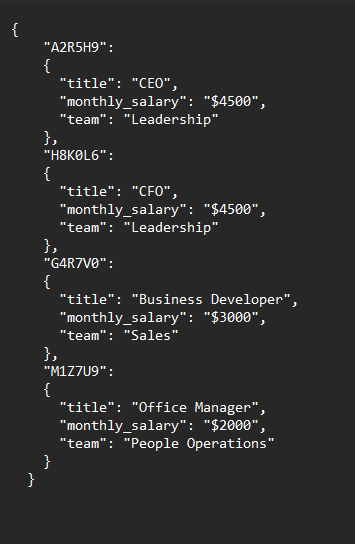

**Here are the xlxs files**:

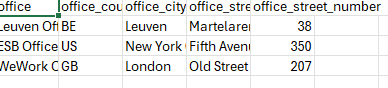

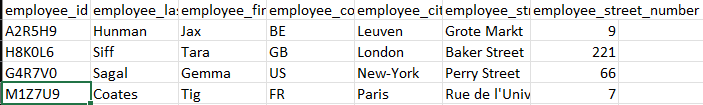



###**Conclusion**

As the first data practitioner in the company, my primary objective was to bring structure and standardization to the scattered HR data. The data, initially stored in multiple formats such as **Excel 📊, CSV 📄, and JSON 🗂️** across different teams, required extensive cleaning, merging, and transformation to create a **unified and reliable dataset**.  


---



### **🛠️ Data Cleaning & Merging**  
✅ Standardized column names and formats to ensure consistency.  
✅ Handled missing values and duplicate records to improve data integrity.  
✅ Converted and merged data from various sources into a **single structured dataset** (`employees_final`).  


### **🚀 Potential Applications**  
📌 **Workforce Planning:** HR teams can use this dataset to enhance workforce planning, identify **high-performing employees**, and improve **retention strategies**.  
📊 **Predictive Analytics:** The structured data enables predictive modeling for **employee attrition** and **hiring needs**.  
📈 **Automated Insights:** Future integration with **dashboards and automated reporting** will provide **real-time insights** for decision-making.  


---


By structuring the HR data, the company now has a solid foundation for data-driven decision-making. Moving forward, implementing data governance policies and automating data collection processes will further enhance efficiency and scalability.  